In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
import os
os.listdir('/kaggle/input/data-co2')


['data-CO2.csv']

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

df = pd.read_csv("/kaggle/input/data-co2/data-CO2.csv")  


print(df.columns.tolist())

cols = {c.strip().replace("\xa0", " ").replace("&nbsp;", " "): c for c in df.columns}
xcol = cols.get("Vulnerability", "Vulnerability")
ycol = cols.get("Readiness", "Readiness")
sizecol = cols.get("CO2 per Capita", "CO2 per Capita")
colorcol = "Color" if "Color" in df.columns else None

['ISO3', 'Name', '&nbsp;', '&nbsp;.1', 'Gain', 'Categoryy', 'CO2 per Capita', 'Color']


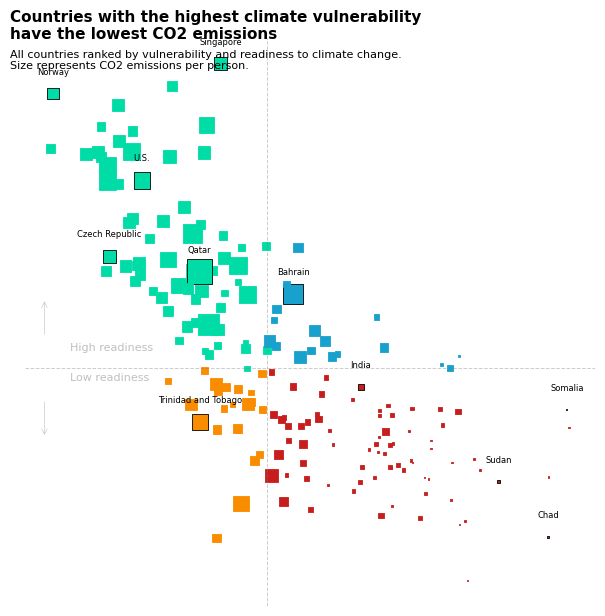

In [32]:
# —— Function to set edge colors (returns a column of colors for each row) ——
def circle_countries(country_names: list):
    edge = df["Color"].copy()   # Default edge color is the original "Color"
    mask = df["Name"].isin(country_names)
    edge.loc[mask] = "black"    # Countries to be highlighted get black edges
    return edge

# —— Function to label countries above their points (extracts scalar coordinates) ——
def add_country_name(country_names: list):
    for country_name in country_names:
        row = df.loc[df["Name"] == country_name]
        if row.empty:
            continue  # Skip if country name not found in df
        x = float(row["&nbsp;"].iloc[0])     # Vulnerability
        y = float(row["&nbsp;.1"].iloc[0])   # Readiness
        ax.text(x, y + 0.025, country_name, size=6, ha="center", zorder=3)

# Countries to circle (must exactly match df["Name"])
country_to_circle = [
    "Norway","Singapore","U.S.","Czech Republic","Qatar","Bahrain",
    "Somalia","Sudan","India","Trinidad and Tobago","Chad",
]

edgecolors = circle_countries(country_to_circle)

# ——— Plotting ———
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    df["&nbsp;"],           # x-axis: Vulnerability
    df["&nbsp;.1"],         # y-axis: Readiness
    s=df["CO2 per Capita"] * 10,
    c=df["Color"],
    edgecolors=edgecolors,  # custom edge colors
    linewidths=0.6,
    marker="s",
    zorder=2,
)

add_country_name(country_to_circle)

# Title and subtitle
fig.text(0, 0.97, 
         "Countries with the highest climate vulnerability\nhave the lowest CO2 emissions",
         fontsize=11, ha="left", family="dejavu sans", weight="bold")
fig.text(0, 0.92,
         "All countries ranked by vulnerability and readiness to climate change.\n"
         "Size represents CO2 emissions per person.",
         fontsize=8, ha="left", family="dejavu sans", multialignment="left")

# Reference lines
ax.axvline(0.43, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)
ax.axhline(0.41, color="gray", linestyle="--", linewidth=0.7, alpha=0.4)

# Minimalist styling
for s in ["top","right","bottom","left"]:
    ax.spines[s].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis="both", which="both", length=0)

# Text + arrows
fig.text(0.1, 0.45, "High readiness", color="silver", size=8)
fig.text(0.1, 0.4,  "Low readiness",  color="silver", size=8)
arrowprops = dict(arrowstyle="->", color="silver", lw=0.4)
ax.annotate("", xy=(0.25, 0.32), xytext=(0.25, 0.37), arrowprops=arrowprops)
ax.annotate("", xy=(0.25, 0.50), xytext=(0.25, 0.45), arrowprops=arrowprops)

plt.tight_layout()
plt.show()


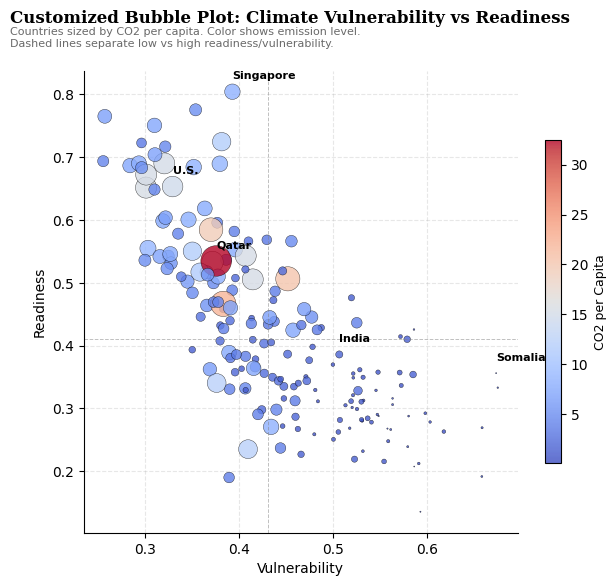

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.cm as cm

# Map colors based on CO2 per Capita values
cmap = plt.colormaps["coolwarm"]
norm = plt.Normalize(df["CO2 per Capita"].min(), df["CO2 per Capita"].max())

fig, ax = plt.subplots(figsize=(7, 6))

# Draw bubbles
sc = ax.scatter(
    df["&nbsp;"], 
    df["&nbsp;.1"], 
    s=df["CO2 per Capita"] * 15,
    c=df["CO2 per Capita"],  # Color determined by emission level
    cmap=cmap,
    alpha=0.8,
    edgecolor="black",
    linewidths=0.3,
    marker="o",
    zorder=2
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.7)
cbar.set_label("CO2 per Capita", fontsize=9)

# Annotate selected countries
for country in ["U.S.", "Singapore", "India", "Somalia", "Qatar"]:
    x_axis = df.loc[df["Name"] == country, "&nbsp;"].values[0]
    y_axis = df.loc[df["Name"] == country, "&nbsp;.1"].values[0]
    ax.text(x_axis, y_axis + 0.02, country, fontsize=8, weight="bold")

# Add reference lines
ax.axvline(0.43, color="gray", linestyle="--", linewidth=0.7, alpha=0.5)
ax.axhline(0.41, color="gray", linestyle="--", linewidth=0.7, alpha=0.5)

# Add title and subtitle
fig.text(
    0.02, 0.96, 
    "Customized Bubble Plot: Climate Vulnerability vs Readiness", 
    fontsize=12, weight="bold", family="serif"
)
fig.text(
    0.02, 0.92, 
    "Countries sized by CO2 per capita. Color shows emission level.\n"
    "Dashed lines separate low vs high readiness/vulnerability.",
    fontsize=8, color="dimgray"
)

# Adjust axis styles
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, linestyle="--", alpha=0.3)

ax.set_xlabel("Vulnerability", fontsize=10)
ax.set_ylabel("Readiness", fontsize=10)

plt.show()

